# Lecture 3 - 양자 회로의 실행과 백엔드

1. 양자 회로의 실행
2. 백엔드

## 1. 양자 회로의 실행

큐비트와 연산자를 추가하여 양자 회로를 만들었다면 시뮬레이션이나 실제 양자 컴퓨터에 실행에 작업을 보내 실행시켜 결과값을 얻을 수 있습니다. 우선은 하나의 양자 회로를 만들어 양자 회로를 실행해 봅시다.

In [1]:
from qiskit import * # qiskit이라는 라이브러리를 모두 불러옵니다.
from qiskit.visualization import plot_histogram, plot_circuit_layout # plot_histogram과 plot_circuit_layout 라이브러리를 불러옵니다.

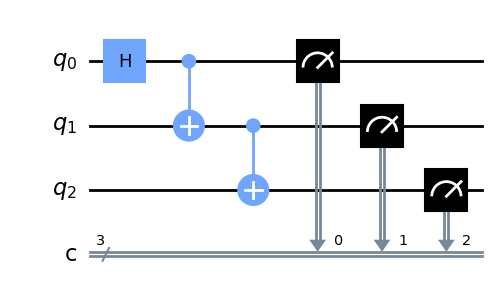

In [2]:
qc=QuantumCircuit(3,3) # 3개의 큐비트와 3개의 고전 비트를 가진 양자 회로를 만듭니다.
qc.h(0) # 0번 큐비트에 하다마드 게이트를 적용합니다.
qc.cx(0,1) # 0번 큐비트를 control 1번 큐비트에 target으로 지정해 CX 게이트를 적용합니다.
qc.cx(1,2) # 1번 큐비트를 control 2번 큐비트에 target으로 지정해 CX 게이트를 적용합니다.
qc.measure([0,1,2],[0,1,2]) # 0,1,2번 큐비트를 0,1,2번 고전 비트에 측정합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

양자 회로를 만들었으므로 이 양자회로를 양자 회로를 시뮬레이션이나 실제 양자 컴퓨터에 보내 결과값을 불러오겠습니다. 양자 회로를 실행하기 위해선 아래와 같은 단계가 필요합니다.
1. 백엔드 불러오기
2. 실행 함수 사용하여 양자회로, 백엔드, 샷의 갯수를 지정해주기
3. 결과값 불러오기
4. 결과값에서 사용하는 값을 추출하기

### 시뮬레이션을 이용해 양자 회로 실행하기

이번 예제에서는 `qasm_simulator`을 사용하여 실행해 봅시다. `qasm_simulator`은 노이즈가 없는 시뮬레이션이며 양자 회로를 실행할때 노이즈가 없는 결과값을 내보냅니다.

In [3]:
backend = Aer.get_backend('qasm_simulator') # 시뮬레이터를 불러옵니다.
job = execute(qc, backend, shots=1024) # 시뮬레이터에 qc 양자 회로를 1024번 실행합니다.
result = job.result() # 결과를 result에 저장합니다.
counts = result.get_counts(qc) # result에서 1024번의 qc 양자 회로 결과를 counts에 저장합니다.
print(counts) # counts를 출력합니다.

{'111': 486, '000': 538}


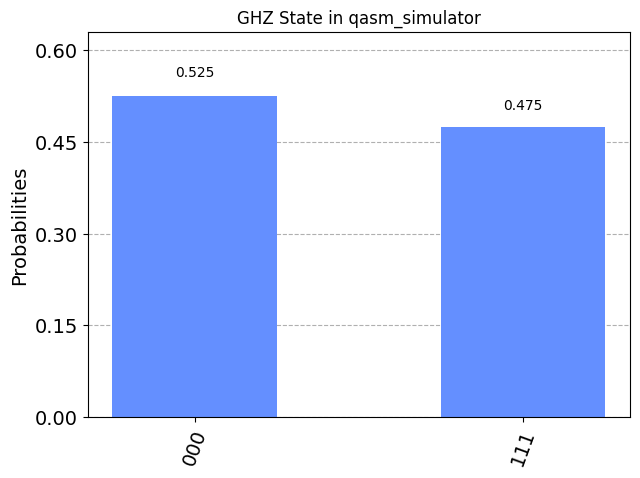

In [4]:
plot_histogram(counts, title="GHZ State in qasm_simulator")

### 실제 양자 장치를 이용해 양자 회로 실행햐기

실제 양자 장치에는 발열, 주변 환경과 같은 여러 노이즈에 노출이 되어 있으며 양자 회로를 실행할때 결과값에 노이즈가 영향을 주게 되어 노이즈와 같이 출력됩니다.

우선은 실제 양자 장치에 양자 회로를 실행하기 위해선 아래 단계를 따라 실행해야 합니다.
1. IBMQ 계정 로드 하기
2. 백엔드 불러오기
3. 실행 함수 사용하여 양자회로, 백엔드, 샷의 갯수를 지정해주기
4. 결과값 불러오기
5. 결과값에서 사용하는 값을 추출하기

만약 IBM Quantum Lab을 사용하거나 이미 커널을 실행한 상태에서 IBMQ 계정을 로드한적이 있다면 1번째 단계는 무시하고 2단계로 넘어갈 수 있습니다.

본인의 IBM 계정 토큰은 IBM Quantum 홈페이지에 들어가 아래 사진과 같이 확인 할 수 있으며 복사하기를 눌러 클립보드에 복사 할 수 있습니다.

![ibm_token](./figure/ibm_token.png)

이번 예제에서는 `ibmq_lima`라는 실제 양자 장치를 사용하여 양자 회로를 실행해 보겠습니다. 우선 실제 양자 장치는 제한적이고 이미 다른 사용자에 의해 보내진 작업을 미리 처리 해야 할 수도 있기 때문에 시간이 오래 걸릴 수 있습니다.

In [5]:
# 양자 회로를 보냈을때 실제 양자 장치에 대기열을 실시간으로 볼 수 있는 코드입니다.
from qiskit.tools import jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [6]:
#본인 IBM 계정의 토큰을 여기에 넣어주세요.
TOKEN = "MY_TOKEN"

# IBM 계정을 불러온적이 없다면 아래의 코드를 주석을 없애 한번만 실행해주세요
# IBMQ.save_account(TOKEN)


In [7]:
provider = IBMQ.load_account() # IBM 계정을 로드 합니다.

In [9]:
# IBM 백엔드를 불러옵니다.
backend=provider.get_backend('ibm_perth') # ibmq_<CITY> -> ibm_<CITY>로 변경해주세요.

# 양자 회로 백엔드에 실행합니다.
# job = execute(qc, backend, shots=1024)
job = backend.retrieve_job('cmf788hfysfg008t2q70') # JOB_ID에는 본인이 실행한 JOB의 ID를 넣어주세요.

`job.cancel()`을 사용하여 보낸 양자 회로 작업을 취소 할 수 있습니다.

`job.status()`를 사용하여 작업의 상태를 볼 수 있습니다.

`job_monitor(job)`을 사용하여 보내진 작업을 실시간으로 모니터링 할 수 있습니다.

`job.job_id()`를 사용하면 보낸 작업의 id를 출력합니다.

In [10]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [11]:
job.job_id()

'cmf788hfysfg008t2q70'

In [12]:
from qiskit.tools import job_monitor # job_monitor 라이브러리를 불러옵니다.

job_monitor(job)

Job Status: job has successfully run


In [13]:
result = job.result() # 결과를 result에 저장합니다.
counts = result.get_counts(qc) # result에서 1024번의 qc 양자 회로 결과를 counts에 저장합니다.
print(counts)

{'111': 441, '001': 19, '010': 9, '100': 14, '000': 482, '011': 20, '110': 38, '101': 1}


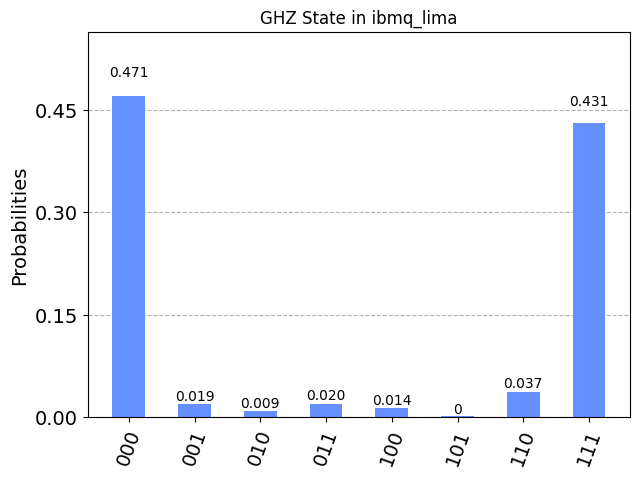

In [14]:
plot_histogram(counts, title="GHZ State in ibmq_lima") # counts를 그립니다.

실제 양자 장치에는 노이즈의 영향을 받아 예상했던 값인 $|000\rangle$ 과 $|111\rangle$이 아닌 그 외의 상태들도 낮은 확률로 출력된것을 확인 할 수 있습니다.

***
양자 회로 트랜스파일 이후에 실행하기
***

양자 회로를 시뮬레이션이나 실제 양자 장치에 실행시키는 또다른 방법으로 장치에 보내기전 양자 회로를 먼저 트랜스파일 하는 방법이 있습니다. 양자 회로를 백엔드에 실행하기 위해서는 각 백엔드에 맞는 기본 게이트에 맞게 트랜스파일 해줘야 합니다. 백엔드에 맞는 기본 게이트는 `backend.configuration().basis_gates`를 사용하여 볼 수 있으며 해당 백엔드로 양자 회로를 트랜스 파일을 하게 되면 기본 게이트로 트랜스파일 되며 변경된것을 볼 수 있습니다. 이후에 이러한 트랜스 파일된 양자 회로를 `run()`을 사용하여 해당 백엔드에 실행셔줍니다.

In [15]:
from qiskit.compiler import transpile, assemble # transpile과 assemble 라이브러리를 불러옵니다.

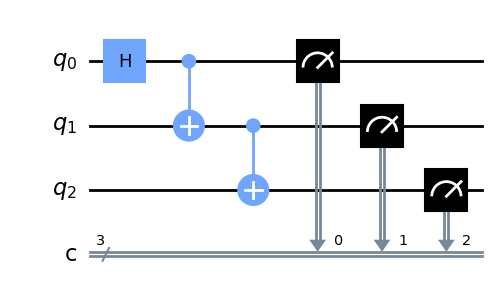

In [16]:
qc.draw(output='mpl') # 양자 회로를 그립니다.

양자 회로를 트랜스파일 해주기 전에 `ibmq_lima` 백엔드가 어떠한 기본 게이트로 구성되어 있는지 확인해 봅시다.

In [18]:
backend = provider.get_backend('ibm_perth') # ibmq_lima 백엔드를 불러옵니다.

backend.configuration().basis_gates # 백엔드의 기본 게이트를 출력합니다.

['id', 'rz', 'sx', 'x', 'cx', 'reset']

`ibmq_lima` 백엔드에는 기본 게이트인 $CX, I, RZ, SX, X$ 게이트로 구성되있는것을 알 수 있습니다. `transpile`의 정도는 최적화의 단계를 설정해줌에 따라 달라지지만 이것에 대해서는 밑에서 자세히 다루겠습니다.

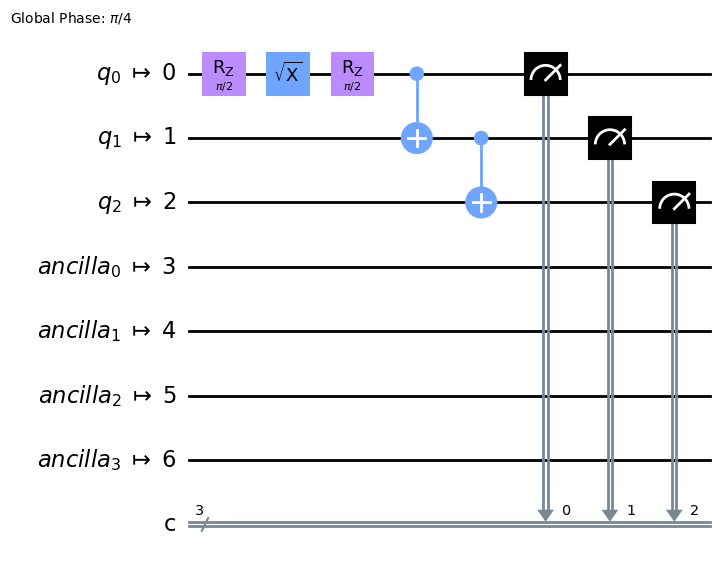

In [20]:
backend = provider.get_backend('ibm_perth') # ibmq_lima 백엔드를 불러옵니다.

transpile_circuit = transpile(qc,backend) #backend에 맞게 qc 양자 회로를 transpile합니다.

transpile_circuit.draw(output="mpl") # transpile한 qc 양자 회로를 그립니다.

이제 트랜스파일 한 양자 회로를 실행해 봅시다.

In [21]:
# job = backend.run(transpile_circuit) # transpile한 qc 양자 회로를 ibmq_lima 백엔드에 실행합니다.

In [22]:
job_monitor(job) # 작업 상태를 실시간으로 확인합니다.

Job Status: job has successfully run


In [23]:
result = job.result() # 결과를 result에 저장합니다.
counts = result.get_counts(qc) # result에서 1024번의 qc 양자 회로 결과를 counts에 저장합니다.
print(counts) # counts를 출력합니다.

{'111': 441, '001': 19, '010': 9, '100': 14, '000': 482, '011': 20, '110': 38, '101': 1}


/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3

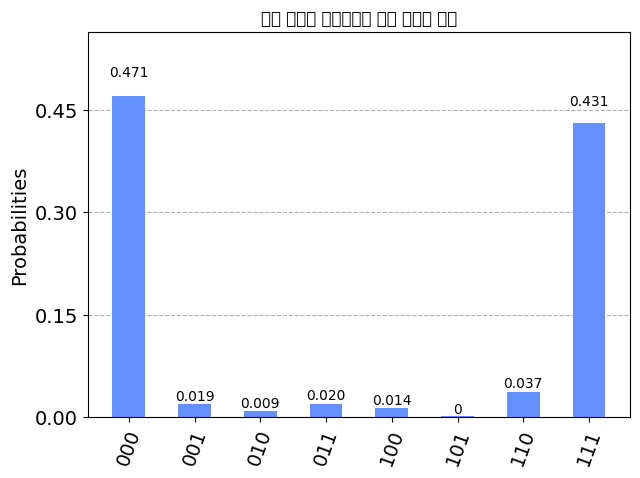

In [24]:
plot_histogram(counts, title="양자 회로를 트랜스파일 하여 실행한 결과") # counts를 그립니다.

결과값을 보게 되면 역시 노이즈에 의해 낮은 확률로 원하지 않은 결과값도 같이 나온것을 볼 수 있습니다.

***
트랜스파일
***

위에서 사용한 트랜스파일 기능은 최적화의 단계를 설정하여 시스템에서 최적화된 양자 회로를 만들 수 있습니다. 또한 회로의 layout 그려 시각화 하여 더욱 많은 정보를 얻을 수 있습니다.
- `plot_circuit_layout(circuit, backend)`를 사용하여 양자 회로의 layout을 그릴 수 있습니다. 양자 회로의 layout은 각 큐비트가 어떠한 큐비트와 연결이 되어 있는지 그리고 실제 장치에서 어떠한 큐비트를 사용을 위해 지정했는지 시각화 하여 보여줍니다.

- `transpile(qc,backend,optimization_level=optional,initial_layout=optional)`을 사용하여 qc라는 양자 회로를 백엔드의 기준 게이트에 맞게 트랜스파일 해줍니다. `optimization_level`를 설정 해준다면 지정해준 단계만큼 최적화 시켜줍니다. 또한 `initial_layout`을 설정 해준다면 원하는 큐비트를 어떠한 실제 큐비트에 지정해주고 싶은지 설정할 수 있습니다.

- `depth()`을 사용하여 트랜스파일된 양자 회로의 깊이를 출력하여 어느정도의 최적화가 효과적인지 비교하며 확인 할 수 있습니다. 

#### 트랜스 파일할 `qc_trans` 양자 회로

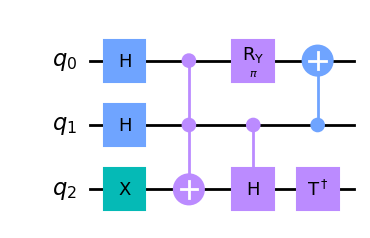

In [25]:
from math import pi

qc_trans=QuantumCircuit(3)
qc_trans.h(range(2))
qc_trans.x(2)
qc_trans.ccx(0,1,2)
qc_trans.ry(pi,0)
qc_trans.ch(1,2)
qc_trans.tdg(2)
qc_trans.cx(1,0)
qc_trans.draw(output='mpl')

#### 최적화 0단계 트랜스파일러

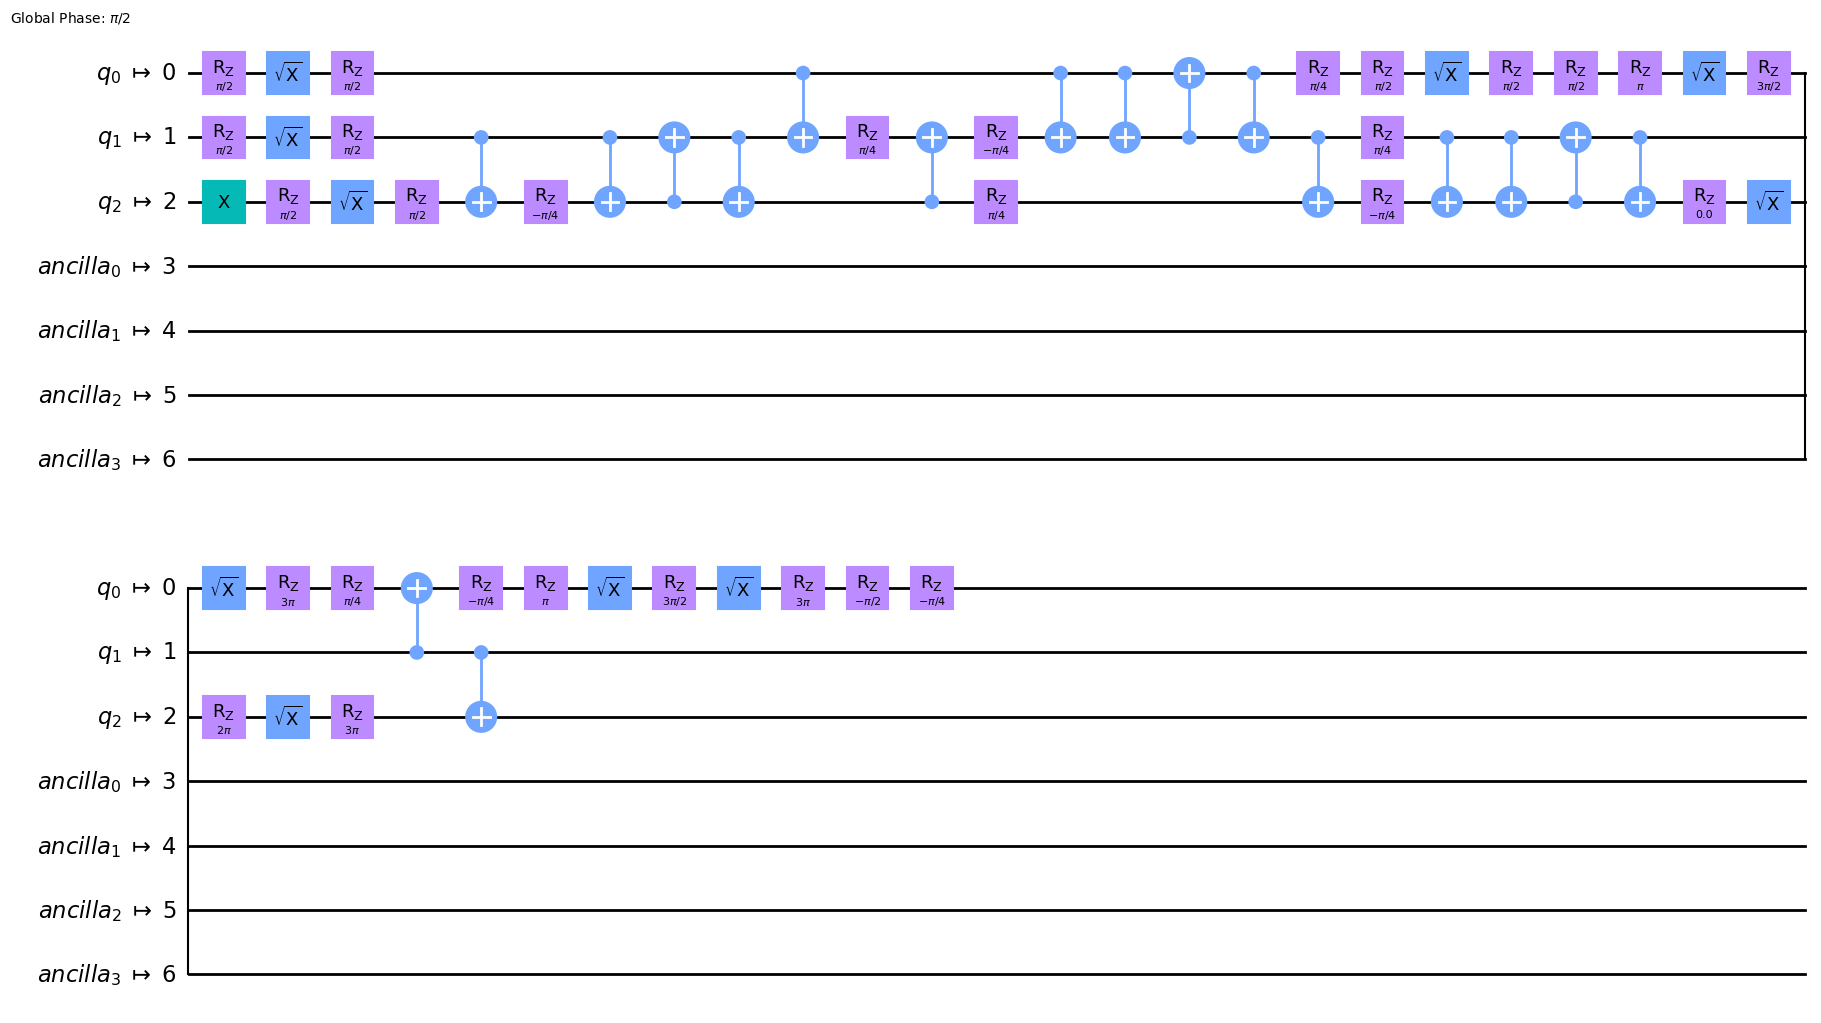

In [26]:
transpile_circuit_0 = transpile(qc_trans,backend, optimization_level=0) # optimization_level을 0으로 설정하여 qc_trans 양자 회로를 트랜스파일 합니다.
transpile_circuit_0.draw(output="mpl") # 트랜스파일한 qc_trans 양자 회로를 그립니다.

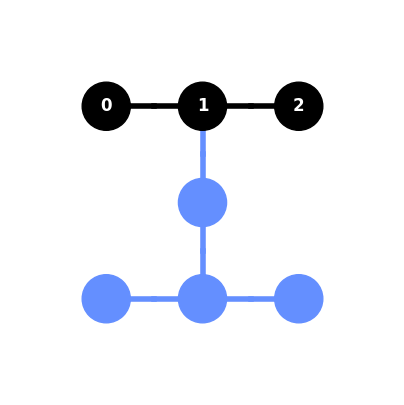

In [27]:
plot_circuit_layout(transpile_circuit_0, backend) # 트랜스파일한 qc_trans 양자 회로의 레이아웃을 그립니다.

In [28]:
transpile_circuit_0.depth() # 트랜스파일한 qc_trans 양자 회로의 깊이를 출력합니다.

37

#### 최적화 1단계 트랜스파일러

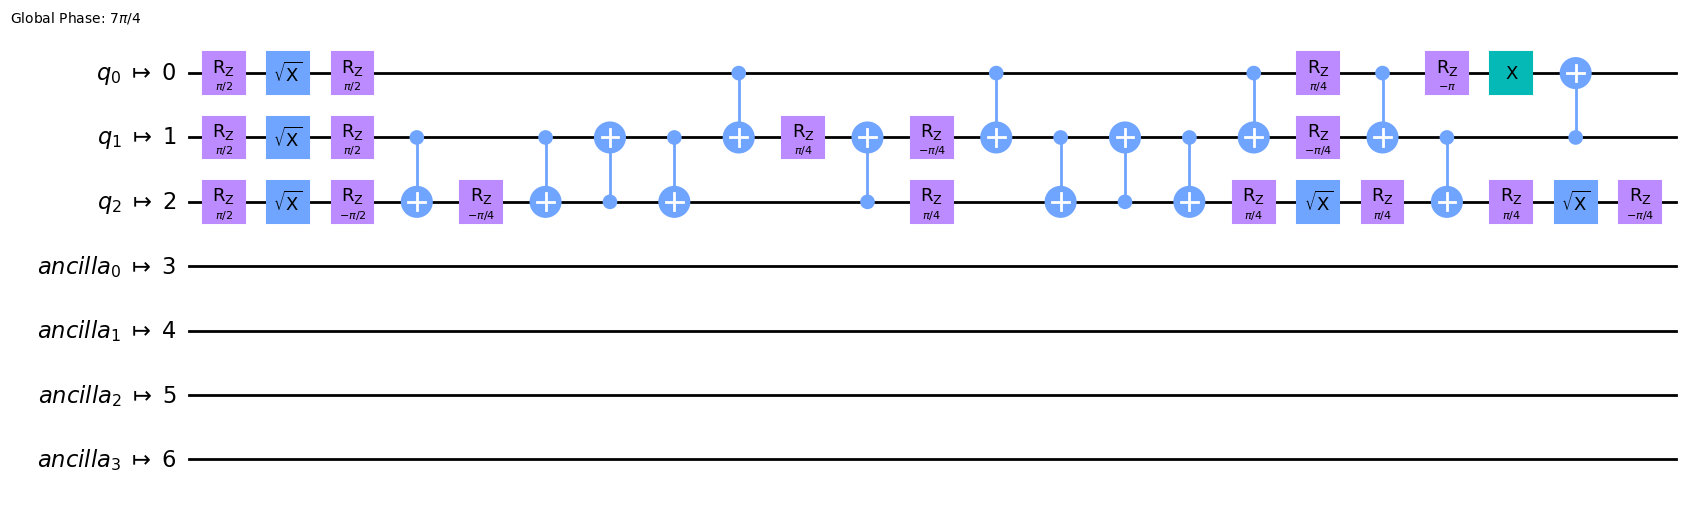

In [29]:
transpile_circuit_1 = transpile(qc_trans,backend, optimization_level=1) # optimization_level을 1로 설정하여 qc_trans 양자 회로를 트랜스파일 합니다.
transpile_circuit_1.draw(output="mpl") # 트랜스파일한 qc_trans 양자 회로를 그립니다.

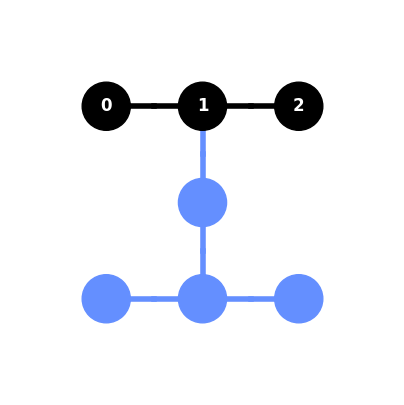

In [30]:
plot_circuit_layout(transpile_circuit_1, backend) # 트랜스파일한 qc_trans 양자 회로의 레이아웃을 그립니다.

In [31]:
transpile_circuit_1.depth() # 트랜스파일한 qc_trans 양자 회로의 깊이를 출력합니다.

23

#### 최적화 2단계 트랜스파일러

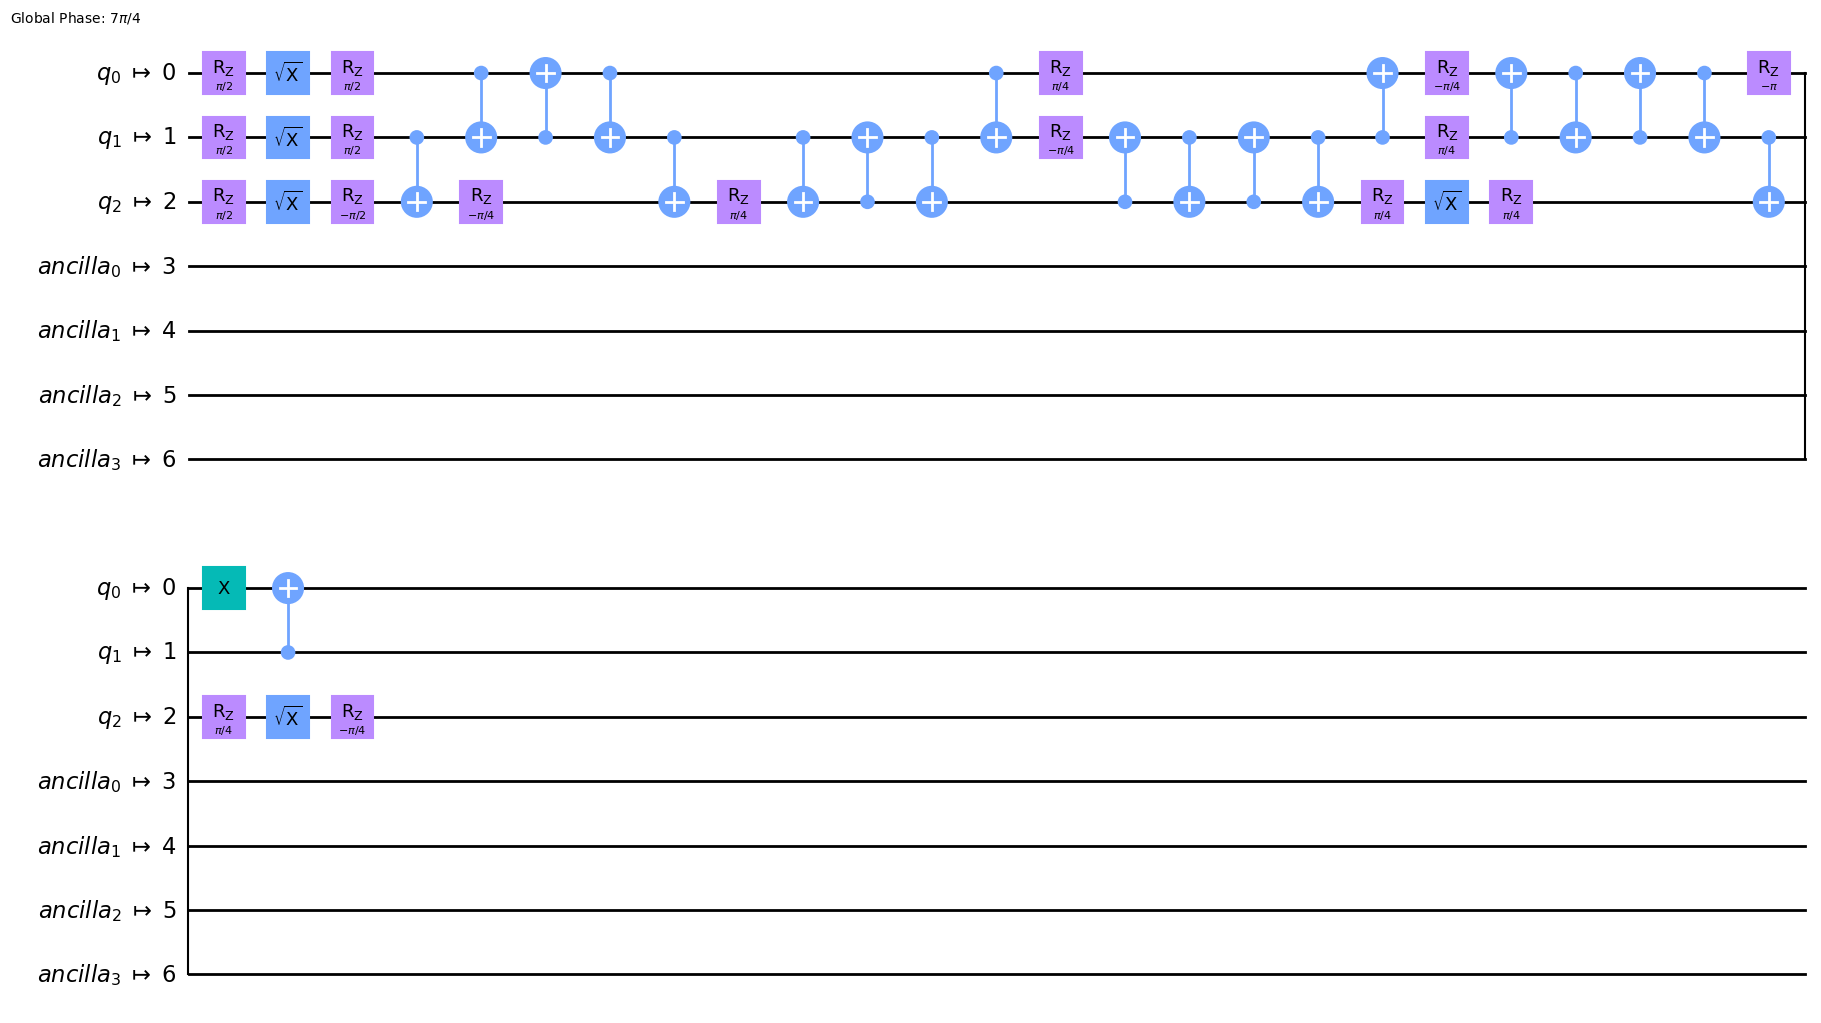

In [32]:
transpile_circuit_2 = transpile(qc_trans,backend, optimization_level=2) # optimization_level을 2로 설정하여 qc_trans 양자 회로를 트랜스파일 합니다.
transpile_circuit_2.draw(output="mpl") # 트랜스파일한 qc_trans 양자 회로를 그립니다.

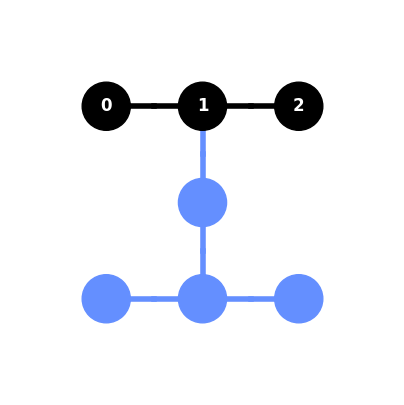

In [33]:
plot_circuit_layout(transpile_circuit_2, backend) # 트랜스파일한 qc_trans 양자 회로의 레이아웃을 그립니다.

In [34]:
transpile_circuit_2.depth() # 트랜스파일한 qc_trans 양자 회로의 깊이를 출력합니다.

28

#### 최적화 3단계 트랜스파일러

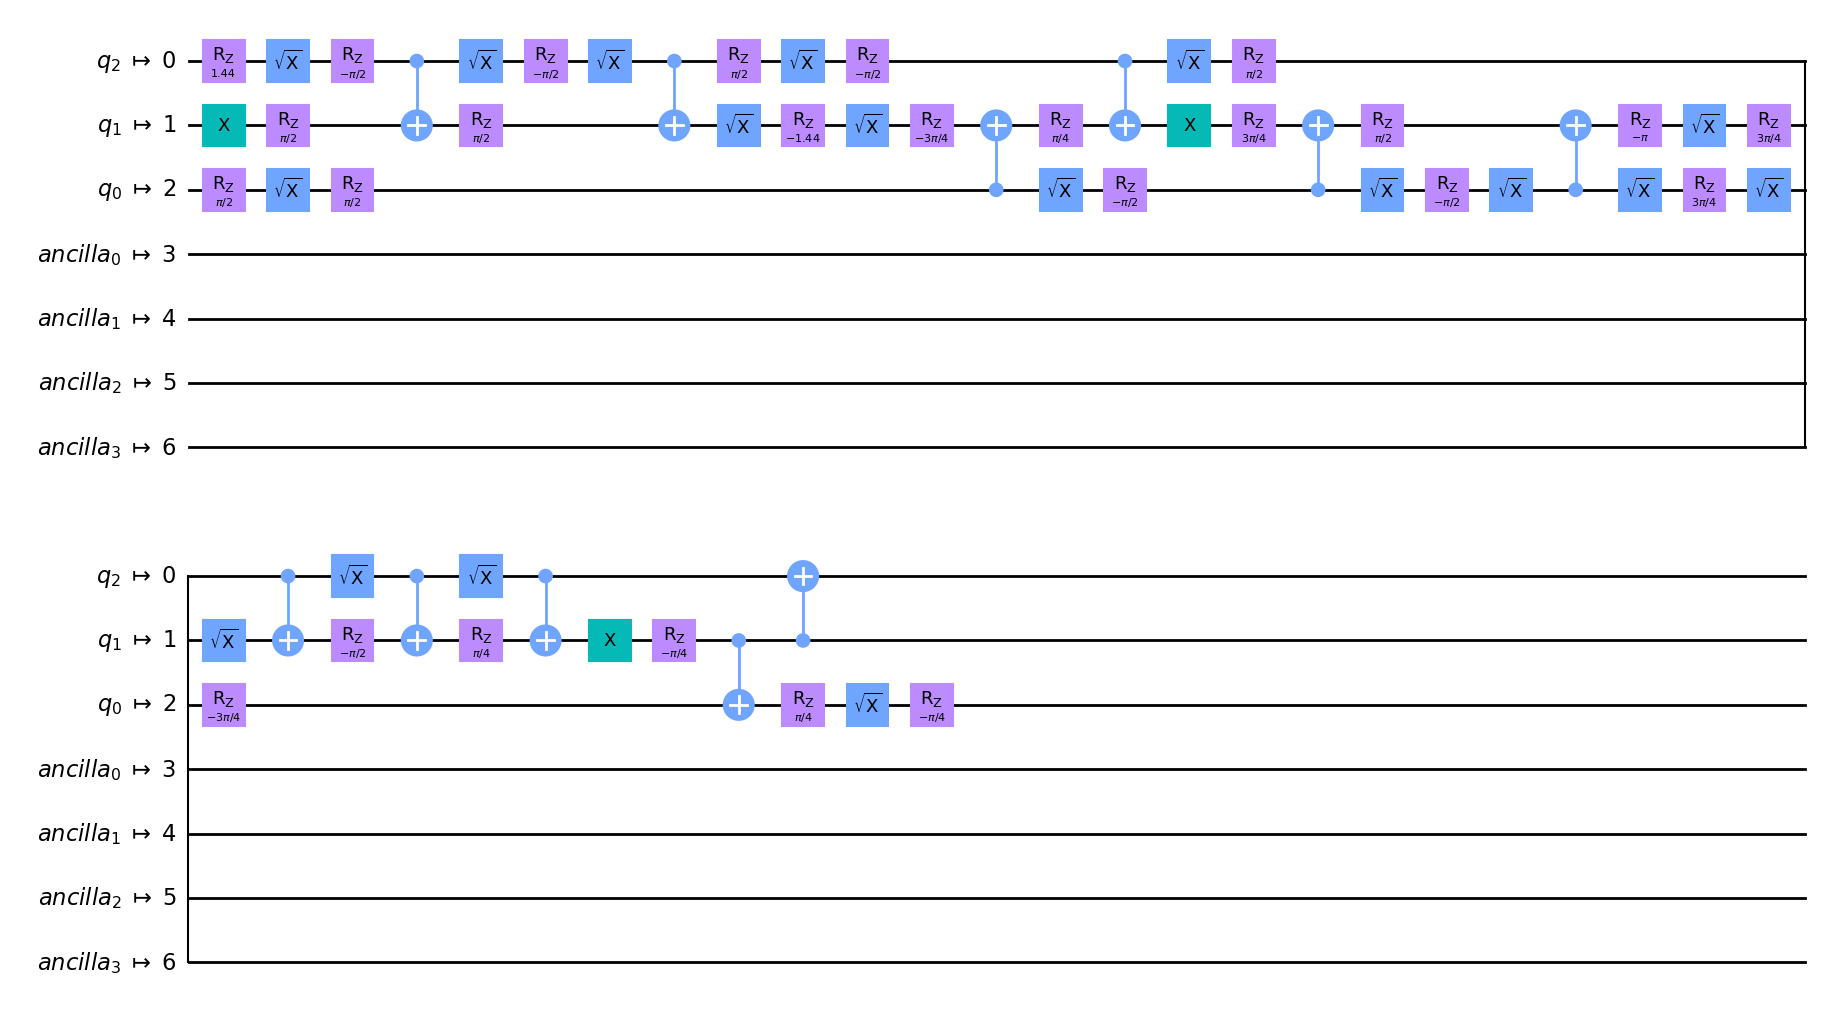

In [35]:
transpile_circuit_3 = transpile(qc_trans,backend, optimization_level=3) # optimization_level을 3으로 설정하여 qc_trans 양자 회로를 트랜스파일 합니다.
transpile_circuit_3.draw(output="mpl") # 트랜스파일한 qc_trans 양자 회로를 그립니다.

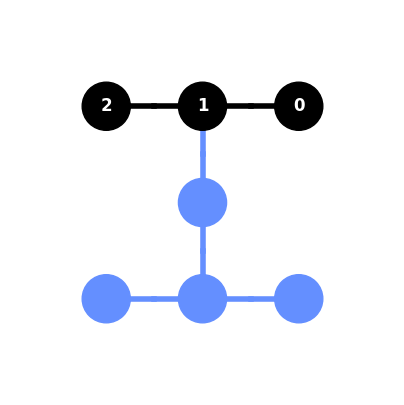

In [36]:
plot_circuit_layout(transpile_circuit_3, backend) # 트랜스파일한 qc_trans 양자 회로의 레이아웃을 그립니다.

In [37]:
transpile_circuit_3.depth() # 트랜스파일한 qc_trans 양자 회로의 깊이를 출력합니다.

37

최적화 단계는 0부터 3까지 이며 최적화 단계가 올라갈 수록 양자 회로의 깊이가 낮아지며 큐비트를 지정하는 실제 물리적 큐비트도 바뀌는것을 확인할 수 있습니다.

## 2. 백엔드
백엔드는 시뮬레이션으로 사용할 수 있으며 실제 양자 장치를 사용할 수 있습니다. 이번 노트북에서는 백엔드를 크게 3가지로 소개하도록 하겠습니다.
- Qiskit Aer
- Basic Aer
- 실제 양자 장치 (Real device)

### Qiskit Aer 백엔드
Qiskit Aer 시뮬레이터는 양자 회로를 노이즈가 있는 실제 양자 장치처럼 시뮬레이터을 하여 실행하게 해줍니다. 사용 가능한 Aer 백엔드는 `Aer.backends()`를 사용하여 확인해볼 수 있습니다. 여기서 노이즈는 실제 있는 IBMQ 장치에서 가상으로 만든 노이즈 모델을 사용할 수 있습니다.

In [38]:
Aer.backends() # Aer 백엔드의 목록을 불러옵니다.

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

목록중 `AerSimulator`을 실행하기 위해 아래와 같이 백엔드로 지정해줘서 사용해줄 수 있습니다. 만약 AerSimulator에 가상 양자 장치 백엔드를 지정 해주지 않았다면 노이즈가 없는 양자 회로를 실행하게 됩니다.

#### 가상 양자 장치를 지정해주지 않은 AerSimulator (노이즈가 없음)

In [39]:
from qiskit.providers.aer import AerSimulator #AerSimulator 라이브러리 불러오기

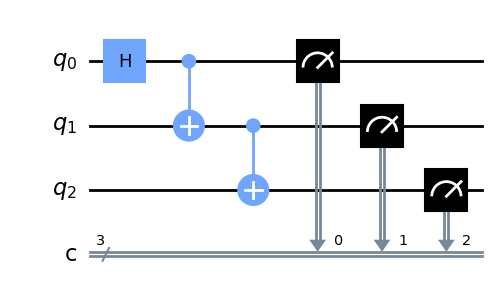

In [40]:
qc.draw(output='mpl') # qc 양자 회로를 그립니다.

In [41]:
backend = AerSimulator() # AerSimulator 백엔드를 불러옵니다.
result = backend.run(qc).result() # qc 양자 회로를 AerSimulator 백엔드에 실행합니다.
counts=result.get_counts(qc) # result에서 기본 설정인 1024번의 qc 양자 회로 결과를 counts에 저장합니다.
print(counts) # counts를 출력합니다.

{'000': 530, '111': 494}


/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48177 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3

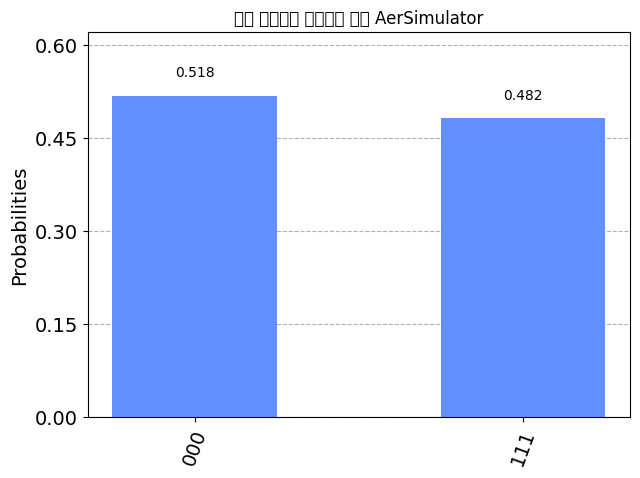

In [42]:
plot_histogram(counts, title="가상 백엔드를 지정하지 않은 AerSimulator") # counts를 그립니다.

#### 가상 양자 장치를 지정해준 AerSimulator (실제 양자 장치 노이즈 모델)

사용 가능한 가상 양자 장치는 `qiskit.test.mock`라이브러리에 있는 `FakeProvider().backends()`를 사용하여 목록을 볼 수 있습니다.

In [43]:
from qiskit.test.mock import FakeProvider # FakeProvider 라이브러리를 불러옵니다.
from qiskit.test.mock import FakeMontreal # FakeMontreal를 불러옵니다.

In [44]:
FakeProvider().backends() # FakeProvider 백엔드의 목록을 불러옵니다.

[<FakeAlmaden('fake_almaden')>,
 <FakeArmonk('fake_armonk')>,
 <FakeAthens('fake_athens')>,
 <FakeBelem('fake_belem')>,
 <FakeBoeblingen('fake_boeblingen')>,
 <FakeBogota('fake_bogota')>,
 <FakeBurlington('fake_burlington')>,
 <FakeCambridge('fake_cambridge')>,
 <FakeCambridgeAlternativeBasis('fake_cambridge')>,
 <FakeCasablanca('fake_casablanca')>,
 <FakeEssex('fake_essex')>,
 <FakeGuadalupe('fake_guadalupe')>,
 <FakeJohannesburg('fake_johannesburg')>,
 <FakeLima('fake_lima')>,
 <FakeLondon('fake_london')>,
 <FakeManhattan('fake_manhattan')>,
 <FakeMelbourne('fake_melbourne')>,
 <FakeMontreal('fake_montreal')>,
 <FakeMumbai('fake_mumbai')>,
 <FakeOpenPulse2Q('fake_openpulse_2q')>,
 <FakeOpenPulse3Q('fake_openpulse_3q')>,
 <FakeOurense('fake_ourense')>,
 <FakeParis('fake_paris')>,
 <FakePoughkeepsie('fake_poughkeepsie')>,
 <FakeQasmSimulator('fake_qasm_simulator')>,
 <FakeQuito('fake_quito')>,
 <FakeRochester('fake_rochester')>,
 <FakeRome('fake_rome')>,
 <FakeRueschlikon('fake_rueschl

이번 예제에서는 `ibmq_montreal`의 실제 양자 장치를 노이즈 모델링 하여 사용 하기 위해 `FakeMontreal`을 AerSimulator에 사용하겠습니다.

In [45]:
backend=AerSimulator.from_backend(FakeMontreal()) # FakeMontreal 백엔드를 AerSimulator을 이용하여 불러옵니다.
result = backend.run(qc).result() # qc 양자 회로를 FakeMontreal 백엔드에 실행합니다.
counts=result.get_counts(qc) # result에서 기본 설정인 1024번의 qc 양자 회로 결과를 counts에 저장합니다.
print(counts) # counts를 출력합니다.

{'001': 6, '010': 27, '101': 51, '000': 455, '111': 463, '011': 12, '110': 4, '100': 6}


/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/quic/anaconda3/e

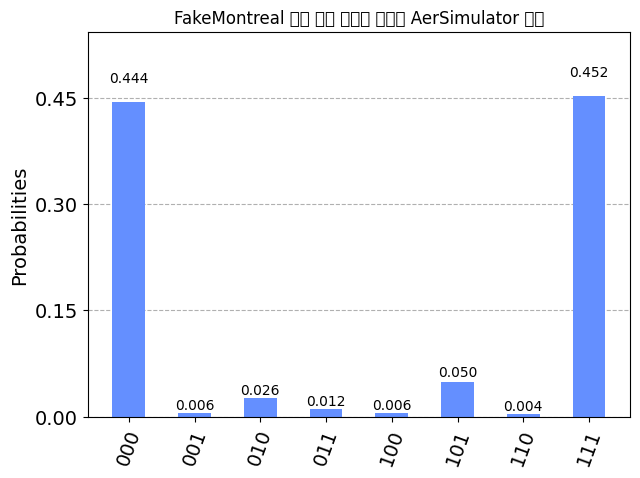

In [46]:
plot_histogram(counts, title="FakeMontreal 가상 양자 장치를 이용한 AerSimulator 결과")

#### 이러한 aer_simulator을 백엔드로 지정하는 3가지의 방법
1. Provider 이용하기
2. Aer 이용하기
3. AerSimulator 이용하기

이러한 다른 방법은 같은 시뮬레이터를 불러오기 때문이 동일한 결과값을 내보냅니다.

***
Provider를 사용하는 방법
***

In [50]:
from qiskit.providers.aer import AerProvider # AerProvider 라이브러리를 불러옵니다.

provider = AerProvider() # AerProvider를 provider로 지정해줍니다.
backend=provider.backends(name='aer_simulator') # provider에서 aer_simulator 백엔드를 불러옵니다.
backend

[AerSimulator('aer_simulator')]

***
Aer를 사용하는 방법
***

In [51]:
backend = Aer.backends(name='aer_simulator') # Aer에서 aer_simulator 백엔드를 불러옵니다.
backend

[AerSimulator('aer_simulator')]

***
AerSimulator를 사용하는 방법
***

In [52]:
backend=AerSimulator() # AerSimulator 백엔드를 불러옵니다.
backend

AerSimulator('aer_simulator')

### Basic Aer 백엔드

Basic Aer은 고전 프로그래밍인 파이썬을 기반으로 둔 양자 시뮬레이터 입니다. 이러한 파이썬 시뮬레이터 Basic Aer은 대표적으로 3가지가 있습니다.
- `qasm simulator`
- `statevector simulator`
- `unitary simulator`

이러한 Basic Aer 백엔드는 `BasicAer.backends()`를 통해 목록을 출력 할 수 있습니다.

In [53]:
backend_list = BasicAer.backends() # BasicAer 백엔드의 목록을 불러옵니다.

for name in backend_list:
    print(name) # BasicAer 백엔드의 목록을 출력합니다.

qasm_simulator
statevector_simulator
unitary_simulator


- `QasmSimulator`


QasmSimulator은 파이썬을 활용한 노이즈가 있는 양자 회로의 시뮬레이터 백엔드 입니다. QasmSimulator은 여러 시뮬레이선 방법을 지원 하며 각 시뮬레이션 방법에 설정 가능한 옵션들이 있습니다. QasmSimulator에 대한 자세한 내용은 [링크](https://qiskit.org/documentation/stubs/qiskit.providers.aer.QasmSimulator.html)를 통해 알 수 있습니다.

- `StatevectorSimulator`


StatevectorSimulator은 노이즈가 없는 이상적인 양자 회로 상태벡터 시뮬레이터 입니다. StatevectorSimulator은 CPU와 GQU 시뮬레이션 방법을 사용하며 추가적으로 설정 할 수 있는 옵션들이 있습니다. StateVectorSimulator에 대한 자세한 내용은 [링크](https://qiskit.org/documentation/stubs/qiskit.providers.aer.StatevectorSimulator.html)를 통해 알 수 있습니다.


- `UnitarySimulator`


UnitarySimulator은 노이즈가 없는 이상적인 양자 회로 유니터리 시뮬레이터 입니다. UnitarySimulator은 CPU와 GPU 시물레이션 방법을 사용하며 추가적으로 설정 할 수 있는 옵션들이 있습니다. UnitarySimulator에 대한 자세한 내용은 [링크](https://qiskit.org/documentation/stubs/qiskit.providers.aer.UnitarySimulator.html)를 통해 알 수 있습니다.

이러한 Basic Aer 시뮬레이터 역세 3가지 방법으로 백엔드로 지정해줄 수 있습니다.
1. BasicAer 사용하기
2. BasicAerProvider 사용하기
3. QasmSimulatorPy 사용하기

***
BasicAer을 이용하여 백엔드로 설정하기
***

In [54]:
backend=BasicAer.backends(name='qasm_simulator')
backend

[<QasmSimulatorPy('qasm_simulator')>]

***
BasicAerProvider을 이용하여 백엔드로 설정하기
***

In [55]:
from qiskit.providers.basicaer import BasicAerProvider

In [56]:
provder = BasicAerProvider() # BasicAerProvider를 provider로 지정해줍니다.
backend=provider.backends(name='qasm_simulator') # provider에서 qasm_simulator 백엔드를 불러옵니다.
backend

[QasmSimulator('qasm_simulator')]

***
QasmSimulatorPy를 이용하여 백엔드로 설정하기
***

In [57]:
from qiskit.providers.basicaer import QasmSimulatorPy # QasmSimulatorPy 라이브러리를 불러옵니다.

In [58]:
backend = QasmSimulatorPy() # QasmSimulatorPy 백엔드를 불러옵니다.
backend

<QasmSimulatorPy('qasm_simulator')>

### 실제 양자 장치

실제 양자 장치에 양자 회로의 작업을 보내 실행 시킬 수 있습니다. 하지만 실제 양자 장치에 작업을 보내게 될 경우 기다린 대기열을 기다릴 필요가 있으며 시간이 생각보다 오래 걸릴 수 있습니다. 우선은 실제 양자 장치에 작업을 보내기 위해 계정을 로드 해줘야 합니다.

In [59]:
ibmq_account = IBMQ.load_account() # IBMQ 계정을 불러옵니다.

ibmqfactory.load_account:WARNING:2023-10-05 21:47:34,114: Credentials are already in use. The existing account in the session will be replaced.


In [60]:
IBMQ.providers() # IBMQ에서 권한을 가지고 사용 할 수 있는 백엔드의 공급자(Provider) 목록을 불러옵니다.

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-internal', group='deployed', project='default')>]

사용 할 수 있는 백엔드의 목록을 불러오기 위해 `backends()`를 사용합니다.

In [61]:
backends = ibmq_account.backends() # ibmq_accounts에서 사용 가능한 백엔드의 목록을 불러옵니다.
backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

특정한 백엔드를 지정해주기 위해 `get_backend('backend')`를 사용합니다.

In [63]:
backend = ibmq_account.get_backend('ibm_perth')
backend

<IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>

또 다른 방법으로는 `get_backend`를 사용 하지 않고 직접 불러올 수 있습니다.

In [64]:
backend = ibmq_account.backend.ibm_perth
backend

<IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>

권한이 많을 수록 더욱 많은 백엔드를 지정 할 수 있으며 이러한 많은 백엔드 중 원하는 백엔드를 찾기 도와주는 옵션들도 있습니다.

***
5 큐비트가 넘는 백엔드에 접근하기
***

우선 허브를 provider을 지정해 필요한 백엔드의 공급자를 지정해줍시다. 여기서는 `hub='ibm-q'`라는 허브를 지정해줄 것이며 지정 해준 허브 안에서 재공되는 백엔드 한에서 백엔드를 찾게 됩니다.

In [65]:
ibmq_provider = IBMQ.get_provider(hub='ibm-q') # ibm-q hub를 불러옵니다.

ibmq_provider.backends() # ibm-q hub에서 사용 가능한 백엔드의 목록을 불러옵니다.

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [66]:
ibmq_provider.backends(filters=lambda b: b.configuration().n_qubits > 5)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

***
정확히 5 큐비트를 가지고 있는 백엔드 찾기
***

In [67]:
ibmq_provider.backends(n_qubits=5, operational=True)

[]

***
사용 가능한 백엔드 중 시뮬레이터를 제외하고 실제 양자 장치만 찾기
***

In [68]:
ibmq_provider.backends(simulator=False, operational=True)

[<IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

***
사용 가능한 백엔드 중 시뮬레이터만 찾기
***

In [69]:

ibmq_provider.backends(simulator=True)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>]

***
실제 양자 장치중에서 가장 대기열이 낮은 백엔드 찾기
***

가장 대기열이 낮은 백엔드는 `least_busy`를 사용하여 불러올 수 있습니다. `least_busy`를 사용하기 위해선 라이브러리를 먼저 불러와야 합니다.

In [70]:
from qiskit.providers.ibmq import least_busy # least_busy 라이브러리를 불러옵니다.

In [71]:
least_busy(ibmq_provider.backends(simulator=False, operational=True))

<IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>

#### 백엔드의 정보 불러오기

백엔드의 정보를 불러올 수 있는 모듈이 있습니다.
- `name()`: 백엔드의 이름을 불러옵니다
- `provider()`: 백엔드의 제공자를 불러옵니다.
- `configuration()`: 백엔드의 환경 정보를 불러옵니다.
- `status()`: 백엔드의 상태를 불러옵니다.
- `properties()`: 백엔드의 구성을 불러옵니다.
- `jobs`: 백엔드에 보내진 작업들을 불러옵니다.

In [72]:
backend.name()


'ibm_perth'

In [73]:
backend.provider()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [74]:
backend.configuration()

In [75]:
backend.status()

In [76]:
backend.properties()


In [77]:
backend.jobs()

[]

여러가지의 모듈을 통해 백엔드의 정보를 추출하여 출력할 수 있는것을 확인할 수 있습니다.

In [78]:
import qiskit.tools.jupyter
%qiskit_version_table #qiskit 버전 표시하기

/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
